In [60]:
import pandas as pd 

In [61]:
PATH_TO_EMOTIONS = "../data/emotions.csv"

In [62]:
emotions_data = pd.read_csv(PATH_TO_EMOTIONS)
emotions_data.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [63]:
emotions_data["label"].unique()

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [64]:
emotions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [65]:
# count total for each unique label
emotions_data["label"].value_counts()   

label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

In [66]:
emotions_data.shape

(20000, 2)

In [67]:
import pandas as pd
import random
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /Users/Cyrille/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Cyrille/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Cyrille/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
stopwords = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('\n', '', text) # remove new line characters
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove hyperlinks
    
    # remove any http words
    text = re.sub(r'http', '', text)
    text = re.sub(r'href', '', text)

    # tokenize text
    tokens = nltk.tokenize.word_tokenize(text)

    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # lemmatize text
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [69]:
emotions_data["text"] = emotions_data["text"].apply(clean_text)

In [70]:
emotions_data.head()

,text,label
0,feel pissed old friend friend,anger
1,ive found made huge difference especially fing...,anger
2,also feel unfortunate nearly reader going meet...,sadness
3,feel petty clairee,anger
4,used believe feeling like fear ignored suppres...,sadness


In [71]:
surprise = emotions_data[emotions_data["label"] == "surprise"]


In [72]:
surprise

,text,label
30,began feel curious tried percieve beneath pride,surprise
44,feel weird completely nothing,surprise
84,care care people disability targeted sensation...,surprise
141,hope keep handing book mormon feel impressed give,surprise
213,ive reading feeling pleasantly surprised find ...,surprise
...,...,...
19890,go around people act normal feel strange,surprise
19901,feel herpes coming would surprised point make ...,surprise
19915,like thing leave others feeling surprised deli...,surprise
19944,feel like monster make way rubble stunned body...,surprise


In [74]:
count_vectorizer = CountVectorizer()
a = count_vectorizer.fit_transform(emotions_data["text"])
a.shape

(20000, 15079)

In [75]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

texts = emotions_data["text"].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 15100 unique tokens.


In [76]:
emotions_data["text"] = emotions_data["text"].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

In [77]:
emotions_data.head()

,text,label
0,"[1, 401, 167, 43, 43]",anger
1,"[20, 220, 46, 902, 979, 172, 853, 1875, 579, 1...",anger
2,"[40, 1, 653, 1113, 625, 27, 676, 263, 2428, 12...",sadness
3,"[1, 551, 7534]",anger
4,"[222, 194, 2, 3, 479, 502, 3210, 37, 71, 95]",sadness


In [ ]:
X, y = emotions_data["text"], emotions_data["label"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [ ]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)
x_val = pad_sequences(x_val, maxlen=100)


In [ ]:
y_train[:10], y_test[:10], y_val[:10]

(252          joy
 18632        joy
 19138       fear
 1673       anger
 17688       love
 8687       anger
 17425      anger
 11006    sadness
 4157         joy
 3440       anger
 Name: label, dtype: object,
 10650        love
 2041      sadness
 8668          joy
 1114      sadness
 13902       anger
 11963         joy
 11072        love
 3002     surprise
 19771     sadness
 8115         fear
 Name: label, dtype: object,
 17353     sadness
 16081       anger
 8282      sadness
 1113      sadness
 9546     surprise
 9413         fear
 7775          joy
 9407         fear
 964           joy
 13581     sadness
 Name: label, dtype: object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Now convert integer labels to one-hot vectors
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)


In [ ]:
y_train_encoded[:10], y_test_encoded[:10], y_val_encoded[:10]

(array([2, 2, 1, 0, 3, 0, 0, 4, 2, 0]),
 array([3, 4, 2, 4, 0, 2, 3, 5, 4, 1]),
 array([4, 0, 4, 4, 5, 1, 2, 1, 2, 4]))

In [124]:
def build_model(word_index):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [117]:
model = build_model(word_index=word_index)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_val, y_val),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
 12/100 [==>...........................] - ETA: 33s - loss: 1.6888 - accuracy: 0.3320

KeyboardInterrupt: 

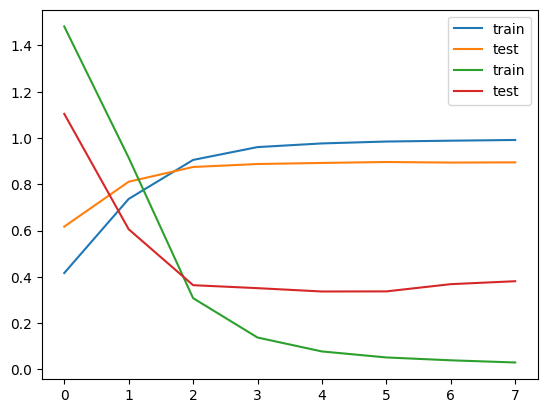

In [ ]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 3s 19ms/step - loss: 0.4045 - accuracy: 0.8907


[0.40448254346847534, 0.890749990940094]

In [ ]:
preds = model.predict(x_test)

125/125 [==============================] - 3s 22ms/step


In [ ]:
preds = preds.argmax(axis=1)

In [ ]:
preds[:10]

array([3, 4, 2, 4, 0, 2, 3, 1, 4, 1])

In [ ]:
y_test = y_test.argmax(axis=1)

In [ ]:
y_test[:10]

array([3, 4, 2, 4, 0, 2, 3, 5, 4, 1])

In [ ]:
def predict_emotion(text):
    text = clean_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=100)
    pred = model.predict(text)
    pred = pred.argmax(axis=1)
    return label_encoder.inverse_transform(pred)[0]

In [ ]:
predict_emotion("I am so happy today!")

1/1 [==============================] - 0s 424ms/step


'joy'

In [ ]:
predict_emotion("I am so sad today!")

1/1 [==============================] - 0s 43ms/step


'sadness'

In [ ]:
# surprise
predict_emotion("Wow i was so unaware of the news!")

1/1 [==============================] - 0s 75ms/step


'anger'

In [ ]:
predict_emotion("I am so furious today!")

1/1 [==============================] - 0s 44ms/step


'anger'

In [ ]:
predict_emotion("It was so unfortunate that I lost my job today!")

1/1 [==============================] - 0s 36ms/step


'sadness'

In [81]:
emotions_data_2 = pd.read_csv("../data/emotions.csv")

In [82]:
# love data 
love_data = emotions_data_2[emotions_data_2["label"] == "love"]

In [83]:
a = love_data["text"].iloc[100]
b = love_data["label"].iloc[100]
a,b 

('i had to have a blood test yesterday so perhaps im feeling particularly fond of it right now because of the doctors needle that was inside of me and the time spent with the dizzy head of a non meat eating nineteen year old female',
 'love')

In [ ]:
predict_emotion(a), b

1/1 [==============================] - 0s 36ms/step


('love', 'love')

## Data augmentation


https://www.analyticsvidhya.com/blog/2022/02/text-data-augmentation-in-natural-language-processing-with-texattack/


https://towardsdatascience.com/data-augmentation-in-nlp-2801a34dfc28

In [78]:
from textattack.augmentation import WordNetAugmenter

/Users/Cyrille/Documents/aiml22/Deep learning/deep_learning_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [79]:
word_aug = WordNetAugmenter()

[nltk_data] Downloading package omw-1.4 to /Users/Cyrille/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [84]:
word_aug.augment(a)

['i had to have a rip test yesterday so perhaps im feeling particularly fond of it redress now because of the doctors needle that was inside of me and the time spent with the dizzy head of a non marrow eating nineteen year older female']

In [ ]:
# function to augment text data by passing in which label to augment and how many samples to generate per row

# def augment_data(label, num_samples):
#     data = emotions_data_2[emotions_data_2["label"] == label]
#     data = data["text"].tolist()
#     augmented_data = []
#     for text in data:
#         augmented_data.append(text)
#         augmented_data.extend(word_aug.augment(text, num_samples))
#     return augmented_data

https://textattack.readthedocs.io/en/latest/2notebook/3_Augmentations.html

In [87]:
import pandas as pd

def augment_data(label, input_data):
    # Filter the DataFrame for the specified label
    data = input_data[input_data["label"] == label]

    # Create a list to store augmented rows
    augmented_rows = []

    # Loop through each text in the data
    for _, row in data.iterrows():
        
        # Generate augmented texts and add them as new rows
        for aug_text in word_aug.augment(row['text']):
            new_row = row.copy()
            new_row['text'] = aug_text
            augmented_rows.append(new_row)

    # Convert the list of rows into a DataFrame
    augmented_data = pd.DataFrame(augmented_rows, columns=data.columns)
    
    updated_emotions_data = pd.concat([input_data, augmented_data], ignore_index=True)

    return updated_emotions_data




In [86]:
data2 = augment_data("love", emotions_data_2)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21641 entries, 0 to 21640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21641 non-null  object
 1   label   21641 non-null  object
dtypes: object(2)
memory usage: 338.3+ KB


In [ ]:
data2["label"].value_counts()

label
joy         6761
sadness     5797
love        3282
anger       2709
fear        2373
surprise     719
Name: count, dtype: int64

In [88]:
data3 = augment_data("surprise", data2)

In [89]:
data3["label"].value_counts()

label
joy         6761
sadness     5797
love        3282
anger       2709
fear        2373
surprise    1438
Name: count, dtype: int64

In [90]:
data4 = augment_data("surprise", data3)

In [91]:
data4["label"].value_counts()

label
joy         6761
sadness     5797
love        3282
surprise    2876
anger       2709
fear        2373
Name: count, dtype: int64

In [92]:
data5 = augment_data("anger", data4)

In [93]:
data5["label"].value_counts()

label
joy         6761
sadness     5797
anger       5418
love        3282
surprise    2876
fear        2373
Name: count, dtype: int64

In [94]:
data6 = augment_data("fear", data5)

In [95]:
data6["label"].value_counts()

label
joy         6761
sadness     5797
anger       5418
fear        4746
love        3282
surprise    2876
Name: count, dtype: int64

In [96]:
data7 = augment_data("surprise", data6)

In [97]:
data7["label"].value_counts()

label
joy         6761
sadness     5797
surprise    5752
anger       5418
fear        4746
love        3282
Name: count, dtype: int64

In [98]:
data8 = augment_data("love", data7)

In [100]:
data8['label'].value_counts()

label
joy         6761
love        6564
sadness     5797
surprise    5752
anger       5418
fear        4746
Name: count, dtype: int64

In [101]:
data8.shape

(35038, 2)

In [103]:
data8["text"] = data8["text"].apply(clean_text)

In [104]:
data8.head()

,text,label
0,feel pissed old friend friend,anger
1,ive found made huge difference especially fing...,anger
2,also feel unfortunate nearly reader going meet...,sadness
3,feel petty clairee,anger
4,used believe feeling like fear ignored suppres...,sadness


In [105]:
count_vectorizer_1 = CountVectorizer()
vectorizer = count_vectorizer_1.fit_transform(data8["text"])
vectorizer.shape

(35038, 18046)

In [106]:
texts2 = data8["text"].tolist()
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(texts2)

word_index2 = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index2))

Found 18067 unique tokens.


In [107]:
data8["text"] = data8["text"].apply(lambda x: tokenizer2.texts_to_sequences([x])[0])

In [108]:
data8.head()

,text,label
0,"[1, 454, 149, 40, 40]",anger
1,"[16, 265, 81, 915, 800, 165, 75, 2332, 426, 1,...",anger
2,"[35, 1, 982, 905, 381, 33, 567, 269, 3543, 129...",sadness
3,"[1, 444, 9228]",anger
4,"[238, 207, 2, 3, 492, 789, 5755, 48, 83, 99]",sadness


In [109]:
X2, y2 = data8["text"], data8["label"]

In [110]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state = 42)

In [111]:
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.2, random_state = 42)

In [112]:
x_train2 = pad_sequences(x_train2, maxlen=100)
x_test2 = pad_sequences(x_test2, maxlen=100)
x_val2 = pad_sequences(x_val2, maxlen=100)

In [113]:
y_train2[:10], y_test2[:10], y_val2[:10]

(14337    sadness
 25735      anger
 9300        love
 17252        joy
 11186       fear
 16342        joy
 24554      anger
 27121       fear
 27034       fear
 17346      anger
 Name: label, dtype: object,
 25526       anger
 896           joy
 29365    surprise
 32697        love
 32777        love
 28106        fear
 29699    surprise
 18515         joy
 29212    surprise
 928          fear
 Name: label, dtype: object,
 24220       anger
 7837      sadness
 16915     sadness
 8567         love
 19977       anger
 5043      sadness
 13892         joy
 30225    surprise
 30887    surprise
 7735      sadness
 Name: label, dtype: object)

In [114]:
label_encoder2 = LabelEncoder()

# Fit the label encoder and transform the labels to integers
y_train_encoded2 = label_encoder2.fit_transform(y_train2)
y_test_encoded2 = label_encoder2.transform(y_test2)
y_val_encoded2 = label_encoder2.transform(y_val2)

# Now convert integer labels to one-hot vectors
y_train2 = to_categorical(y_train_encoded2)
y_test2 = to_categorical(y_test_encoded2)
y_val2 = to_categorical(y_val_encoded2)

In [115]:
y_train_encoded2[:10], y_test_encoded2[:10], y_val_encoded2[:10]

(array([4, 0, 3, 2, 1, 2, 0, 1, 1, 0]),
 array([0, 2, 5, 3, 3, 1, 5, 2, 5, 1]),
 array([0, 4, 4, 3, 0, 4, 2, 5, 5, 4]))

In [125]:
model2 = build_model(word_index2)  

In [121]:
x_train2.shape, y_train2.shape

((22424, 100), (22424, 6))

In [122]:
x_val2.shape, y_val2.shape

((5606, 100), (5606, 6))

In [126]:
history2 = model2.fit(x_train2, y_train2, epochs=10, batch_size=128,validation_data=(x_val2, y_val2),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
176/176 [==============================] - 71s 382ms/step - loss: 1.1547 - accuracy: 0.5701 - val_loss: 0.4038 - val_accuracy: 0.8785
Epoch 2/10
176/176 [==============================] - 67s 381ms/step - loss: 0.2300 - accuracy: 0.9303 - val_loss: 0.2249 - val_accuracy: 0.9288
Epoch 3/10
176/176 [==============================] - 67s 383ms/step - loss: 0.0977 - accuracy: 0.9683 - val_loss: 0.2191 - val_accuracy: 0.9329
Epoch 4/10
176/176 [==============================] - 68s 385ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.2100 - val_accuracy: 0.9324
Epoch 5/10
176/176 [==============================] - 68s 385ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.2219 - val_accuracy: 0.9342
Epoch 6/10
176/176 [==============================] - 74s 419ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.2354 - val_accuracy: 0.9308
Epoch 7/10
176/176 [==============================] - 68s 387ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.2394 - val_ac

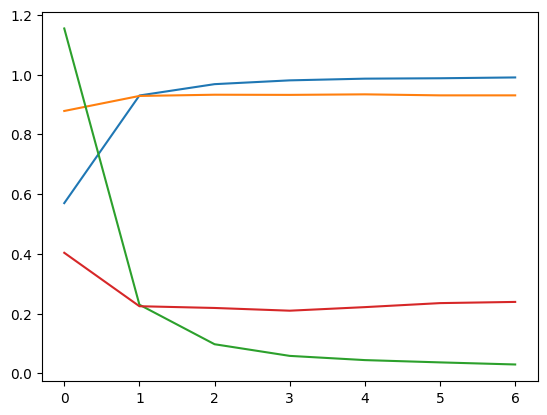

In [128]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')

plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')

In [129]:
model2.evaluate(x_test2, y_test2)

219/219 [==============================] - 5s 23ms/step - loss: 0.2282 - accuracy: 0.9339


[0.22818851470947266, 0.9339326620101929]

#### Model has improved accuracy has increased 0.891 to 0.934